In [ ]:
# pacotes necessarios
library(funModeling)
library(tidymodels)
library(tidyverse)

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.5 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()     masks scales::discard()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::src()         masks Hmisc::src()
✖ recipes::step()   

Vamos carregar os dados do naufrágio do Titanic

In [ ]:
# utilizamos o janitor para limpar os nomes
df <- read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv") %>%  janitor::clean_names()

# Identificando Outliers
Existem diversas maneiras de identificar os possíveis outliers, a primeira delas é baseada nos quartis, onde definimos uma porcentagem de dados que serão identificados como outliers. Vamos utilizar os dados das taxas (Fare) pagas pelos passageiros para o embarque. As técnicas a seguir são utilizados para identificar outliers em uma analise univariada.

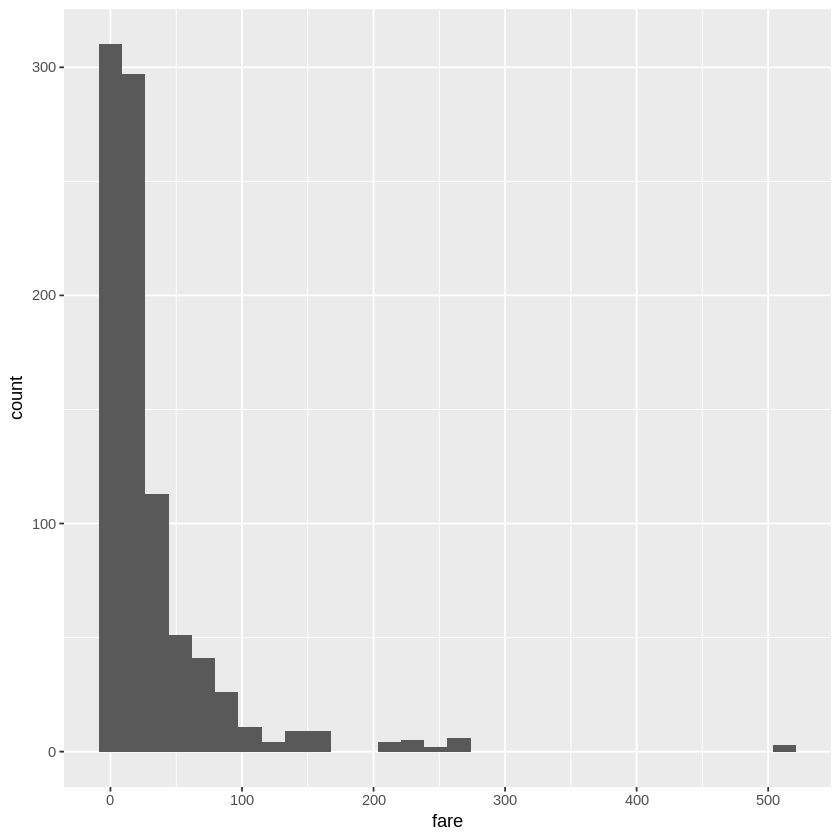

In [ ]:
# histograma da taxa de embarque
ggplot(df, aes(x = fare)) +
  geom_histogram(bins = 30)

Vamos definir os valores dos extremos, utilizando os quantis de 90%, 95% e 99%.



,value,quantile
,<dbl>,<chr>
90%,77.9583,90%
95%,112.0791,95%
99%,249.0062,99%


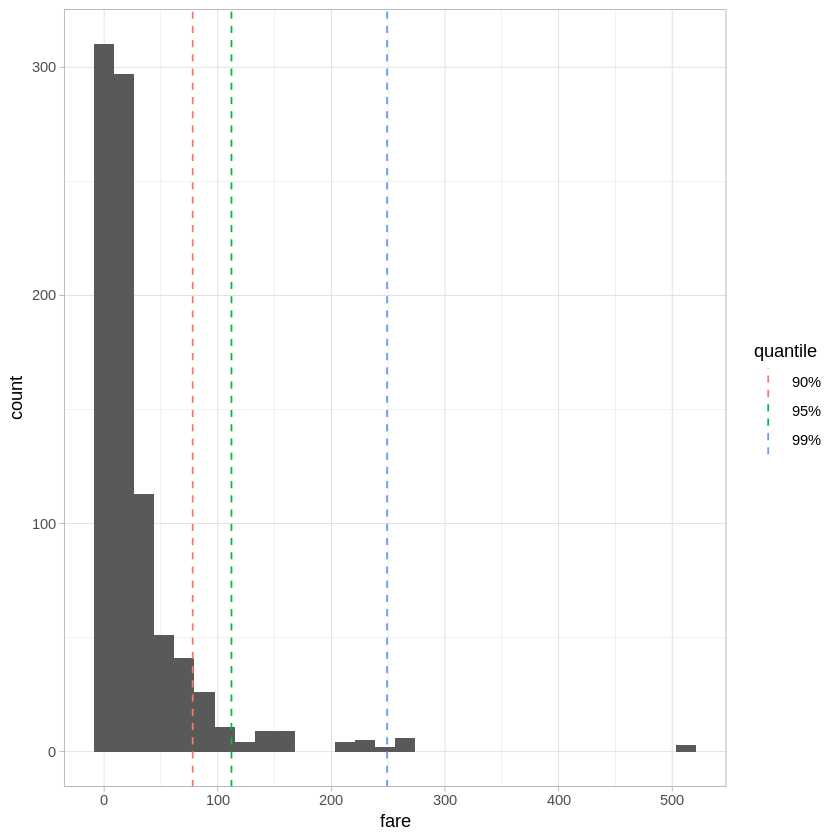

In [ ]:
quantiles_var =
  quantile(df$fare,
           c(0.90, 0.95, 0.99),
           na.rm = T
  )

df_p = data.frame(value=quantiles_var,
                  quantile=c("90%", "95%", "99%")
)


ggplot(df, aes(fare)) +
  geom_histogram(bins = 30) +
  geom_vline(data=df_p,
             aes(xintercept=value,
                 colour = quantile),
             show.legend = TRUE,
             linetype="dashed"
  ) +
  theme_light()
  df_p

Note que nesta situação sempre teremos valores de outliers, podemos definir os limites inferiores como 1%, 5% e 10%.
Podemos utilizar o boxplot para identificar os outliers por meio da IQR (diferença interquartis)

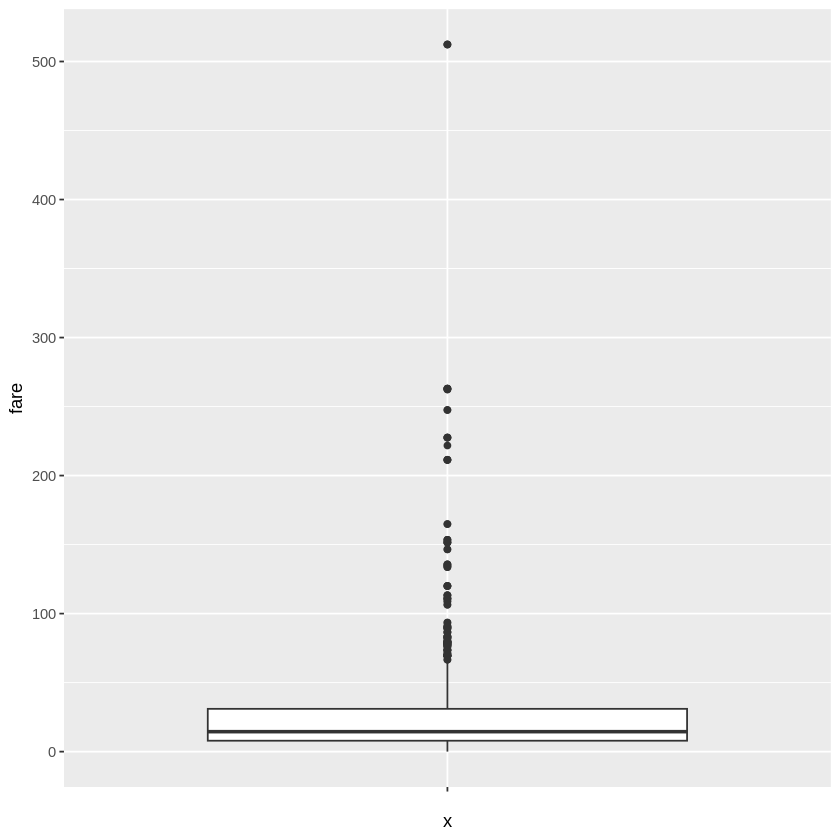

0.0000
7.9104
14.4542
31.0000
65.0000


,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
28,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
32,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NA,1,0,PC 17569,146.5208,B78,C
35,35,0,1,"Meyer, Mr. Edgar Joseph",male,28,1,0,PC 17604,82.1708,,C
53,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0000,B28,
63,63,0,1,"Harris, Mr. Henry Birkhardt",male,45,1,0,36973,83.4750,C83,S
73,73,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5000,,S
89,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S


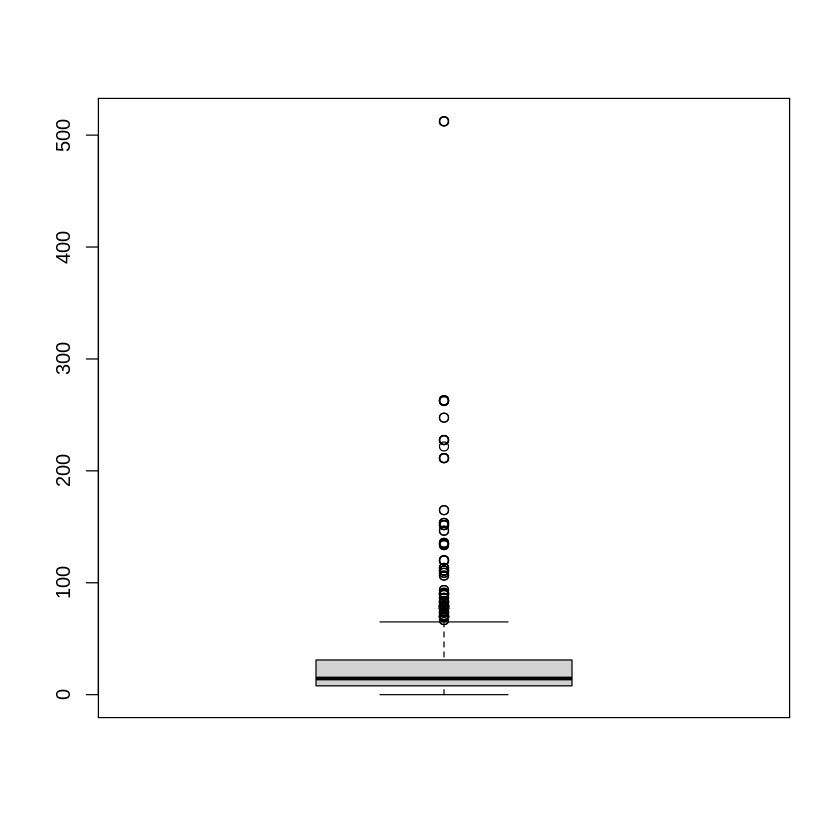

In [ ]:
# outliers usando o IQR
iqr_fare = IQR(df$fare, na.rm = TRUE)
q1_fare = quantile(df$fare, 0.25, na.rm = TRUE)
q3_fare = quantile(df$fare, 0.75, na.rm = TRUE)
lower_bound_fare = q1_fare - 1.5 * iqr_fare # valores comuns: 1.5 ou 3
upper_bound_fare = q3_fare + 1.5 * iqr_fare


# boxplot com a identificação dos outliers
ggplot(df, aes(x = "", y = fare)) +
  geom_boxplot() # boxplot é sempre 1.5

#para obter informações do boxplot
box=boxplot(df$fare)
box$stats

# Encontrar os outliers
df[df$fare < lower_bound_fare | df$fare > upper_bound_fare, ]


O pacote FunModeling disponibiliza métodos para identificação de outliers.

O método de Turkey utiliza o mesmo principio do boxplot, a diferença é o fator de 3 ao invés de 1.5 no IQR.

In [ ]:
# usando o pacote funmodeling

saida=tukey_outlier(df$fare)
print(saida)

bottom_threshold    top_threshold 
        -61.3584         100.2688 


Podemos utilizar o desvio padrão, caso distribuição normal, bem como medidas de variabilidade robustas como MAD.

value,quantile
<dbl>,<chr>
181.2845,sd
45.1627,mad


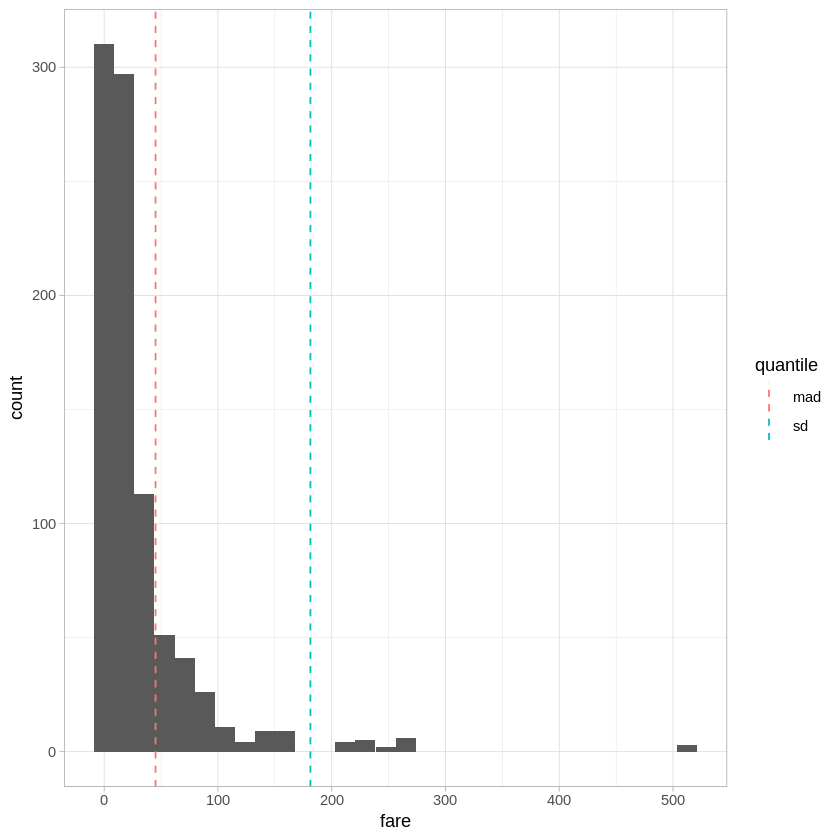

In [ ]:
# Calculando a média, desvio padrão e MAD da variável 'fare'
media_fare = mean(df$fare, na.rm = TRUE)
desvio_padrao_fare = sd(df$fare, na.rm = TRUE)
MAD_fare = mad(df$fare, na.rm = TRUE)

# Definindo um limite para identificar outliers (por exemplo, 3 desvios padrão)
limite_superior = media_fare + 3 * desvio_padrao_fare
limite_inferior = media_fare - 3 * desvio_padrao_fare
limite_superior_mad = median(df$fare, na.rm = TRUE) + 3 * MAD_fare


df_p = data.frame(value=c(limite_superior,limite_superior_mad ),
                  quantile=c("sd", "mad")
)


ggplot(df, aes(fare)) +
  geom_histogram(bins = 30) +
  geom_vline(data=df_p,
             aes(xintercept=value,
                 colour = quantile),
             show.legend = TRUE,
             linetype="dashed"
  ) +
  theme_light()
  df_p

O pacote FunModeling também oferece o calculo dos limites utilizando o MAD

In [ ]:
saida=hampel_outlier(df$fare)
print(saida)

bottom_threshold    top_threshold 
        -16.2543          45.1627 


Agora analisando a identificação de outliers em uma **analise Multivariada**
Ainda não estudamos os conceintos por trás de um modelo de floresta aleatória, mas existem variações deste modelo utilizados para identificar outliers: como a floresta da isolação.
Vamos criar uma relação exponencial entre duas variáveis para utilizar de exemplo:

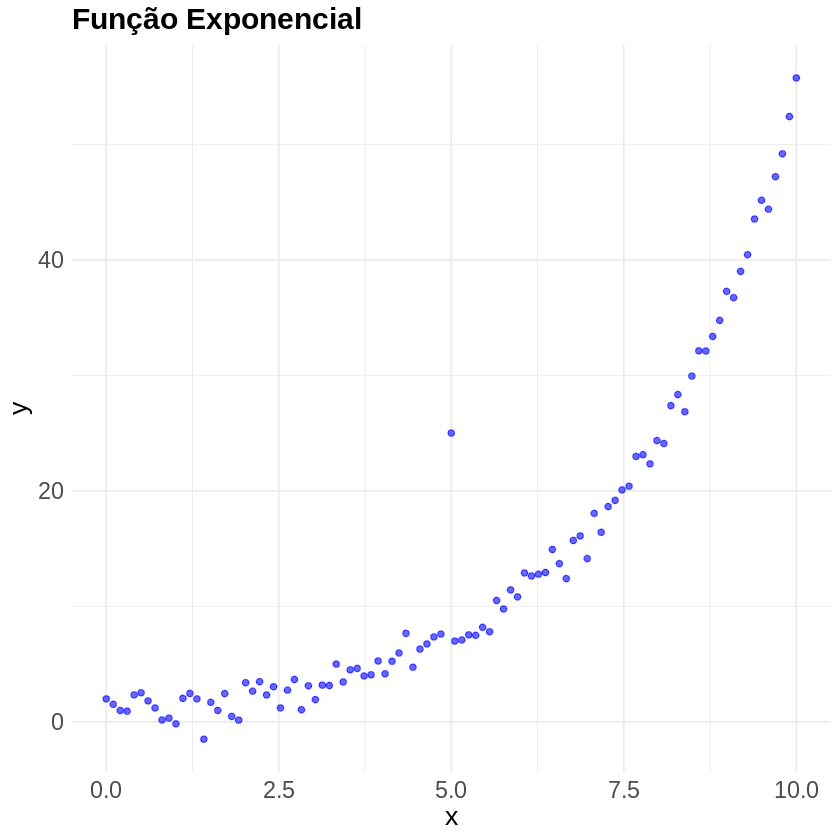

In [ ]:
expo_com_ruido <- function(x, a = 1, b = 0.4, ruido_sd = 1) {
  # a: parâmetro da base exponencial
  # b: taxa de crescimento exponencial
  # ruido_sd: desvio padrão do ruído
  y <- a * exp(b * x)  # Cálculo da função exponencial
  y_ruido <- y + rnorm(length(x), mean = 0, sd = ruido_sd)  # Adicionar ruído após o cálculo
  return(y_ruido)
}

# Exemplo de uso da função
set.seed(2024)  # Para reprodutibilidade
x <- seq(0, 10, length.out = 100)  # Valores para x
y <- expo_com_ruido(x)  # Gerar y com mais ruído

# inserir outlier

x[50]=5
y[50]=25

# Plotar o gráfico de pontos

dados <- data.frame(x = x, y = y)

ggplot(dados, aes(x = x, y = y)) +
  geom_point(color = "blue", alpha = 0.6) +  # Gráfico de pontos com transparência
  labs(title = "Função Exponencial", x = "x", y = "y") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 16),  # Tamanho do título do eixo X
    axis.title.y = element_text(size = 16),  # Tamanho do título do eixo Y
    axis.text.x = element_text(size = 14),   # Tamanho dos rótulos do eixo X
    axis.text.y = element_text(size = 14),   # Tamanho dos rótulos do eixo Y
    plot.title = element_text(size = 18, face = "bold")  # Tamanho do título do gráfico
  )

Agora vamos utilizar uma floresta de isolação para identificar os outliers com o pacote `isotree`

In [ ]:
#isolation forest
#install.packages("isotree")
library(isotree)

# existem recomendações pre-definidas na Literatura, vamos utilisar a Fair-cut
# para mais infos ?isolation.forest.
modelo_if <-isolation.forest(
  dados,
  ndim=2,
  ntrees=100,
  nthreads=1,
  penalize_range=FALSE,
  prob_pick_pooled_gain=1,
  prob_pick_avg_gain=0,
  standardize_data=TRUE) # Fair-cut

# Obter pontuações de anomalia para cada combinação de variáveis
scores <- predict(modelo_if, dados)

# Adicionar a pontuação ao conjunto de dados original para facilitar a interpretação
dados$anomaly_score <- scores

# Definir um threshold para identificar outliers
# Por exemplo, considerar como outlier as observações com pontuação de anomalia maior que 0.7
dados$outlier <- ifelse(dados$anomaly_score > 0.7, "Outlier", "Normal")

print(dados)
#dados[dados$outlier=='Outlier',]

             x          y anomaly_score outlier
1    0.0000000  1.9819694     0.5404126  Normal
2    0.1010101  1.5099464     0.5426875  Normal
3    0.2020202  0.9761915     0.5352638  Normal
4    0.3030303  0.9159862     0.5345554  Normal
5    0.4040404  2.3335074     0.5289368  Normal
6    0.5050505  2.5162276     0.5363133  Normal
7    0.6060606  1.8089819     0.5334396  Normal
8    0.7070707  1.1998426     0.5518633  Normal
9    0.8080808  0.1567109     0.5324653  Normal
10   0.9090909  0.3171997     0.5296815  Normal
11   1.0101010 -0.1740606     0.5416515  Normal
12   1.1111111  2.0285414     0.5258995  Normal
13   1.2121212  2.4561188     0.5408451  Normal
14   1.3131313  1.9839074     0.5166953  Normal
15   1.4141414 -1.5136825     0.5863477  Normal
16   1.5151515  1.6850847     0.5392212  Normal
17   1.6161616  0.9788419     0.5621125  Normal
18   1.7171717  2.4416967     0.5375615  Normal
19   1.8181818  0.4633218     0.5331268  Normal
20   1.9191919  0.1432831     0.5354853 

Outra maneira eficiente de identificar outliers é por meio de medias moveis ou por bloco.
Vamos fazer um exemplo de media por blocos utilizando como métrica o IQR do boxplot.

x,y,anomaly_score,outlier,categoria,status
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
0.0000000,1.9819694,0.5404126,Normal,NA,Normal
0.1010101,1.5099464,0.5426875,Normal,"(0,1]",Normal
0.2020202,0.9761915,0.5352638,Normal,"(0,1]",Normal
0.3030303,0.9159862,0.5345554,Normal,"(0,1]",Normal
0.4040404,2.3335074,0.5289368,Normal,"(0,1]",Normal
0.5050505,2.5162276,0.5363133,Normal,"(0,1]",Normal


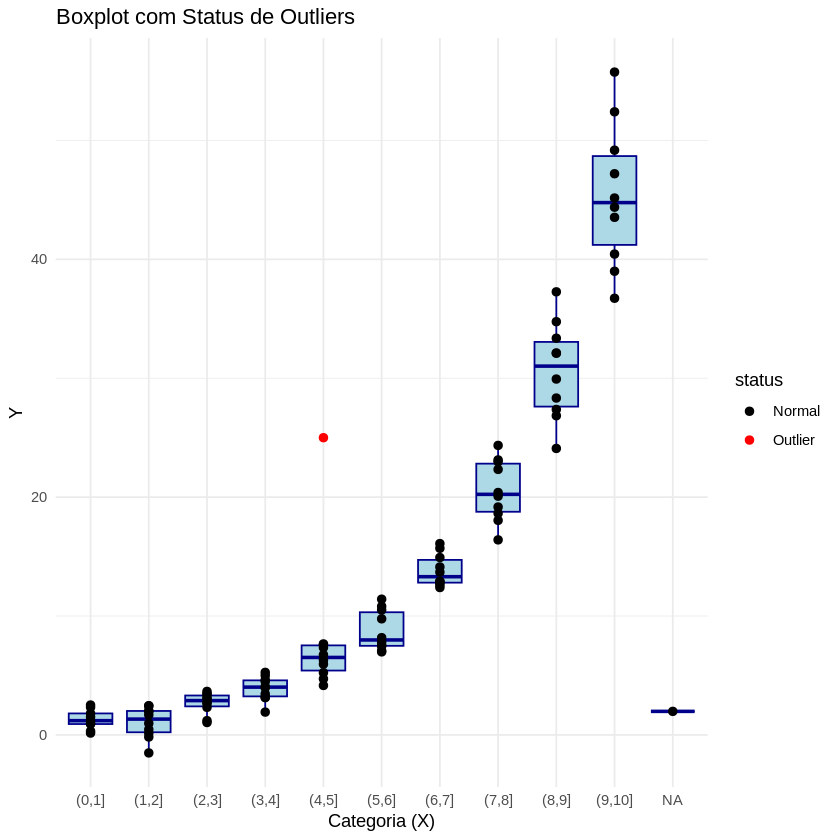

In [ ]:


#vamos adicionar uma coluna de categorias aos dados
dados <- dados %>%
  mutate(categoria = cut(x, breaks = seq(from = 0, to = 10, by = 1)))

# Detecta outliers em cada categoria
dados <- dados %>%
  group_by(categoria) %>%
  mutate(
    Q1 = quantile(y, 0.25),
    Q3 = quantile(y, 0.75),
    IQR = Q3 - Q1,
    lower_bound = Q1 - 1.5 * IQR,
    upper_bound = Q3 + 1.5 * IQR,
    status = ifelse(y < lower_bound | y > upper_bound, "Outlier", "Normal"),
   # y = ifelse(y < lower_bound | y > upper_bound, median(y), y) # caso queira substuir com a media
  ) %>%
  ungroup() %>%  # Remove agrupamento
  select(-Q1, -Q3, -IQR, -lower_bound, -upper_bound) # Remove colunas auxiliares

# Visualizar o resultado
head(dados)

# Plotar boxplot com destaque para os outliers
library(ggplot2)
ggplot(dados, aes(x = categoria, y = y)) +
  geom_boxplot(fill = "lightblue", color = "darkblue") +
  geom_point(aes(color = status), size = 2) +
  scale_color_manual(values = c("Normal" = "black", "Outlier" = "red")) +
  labs(title = "Boxplot com Status de Outliers",
       x = "Categoria (X)", y = "Y") +
  theme_minimal()

A questão agora é quais atitudes podemos tomar quando identificados os outliers:

* Manter: atitude recomendada caso a observação fazer sentido (não for erro),

* Remover a linha (observação): levar os seguintes pontos em consideração:
1. São poucos os outliers perante o volume total de dados.
2. Não temos como obejetivo a anomalia.
* Remover o valor: depende do modelo que vamos usar, bem como a significância do valor removido, caso não modifique significativamente a relação entre as variáveis.

* Limitar o valor ao ponto de corte.

* substituir por valores máximos, médios ou utilizar técnicas mais elaboradas de imputação.

Toda modificação nos dados insere incertezas na nossa analise.
Lembrar de sempre constar nos relatórios/trabalhos as atitudes tomadas com os outliers e dados ausentes.



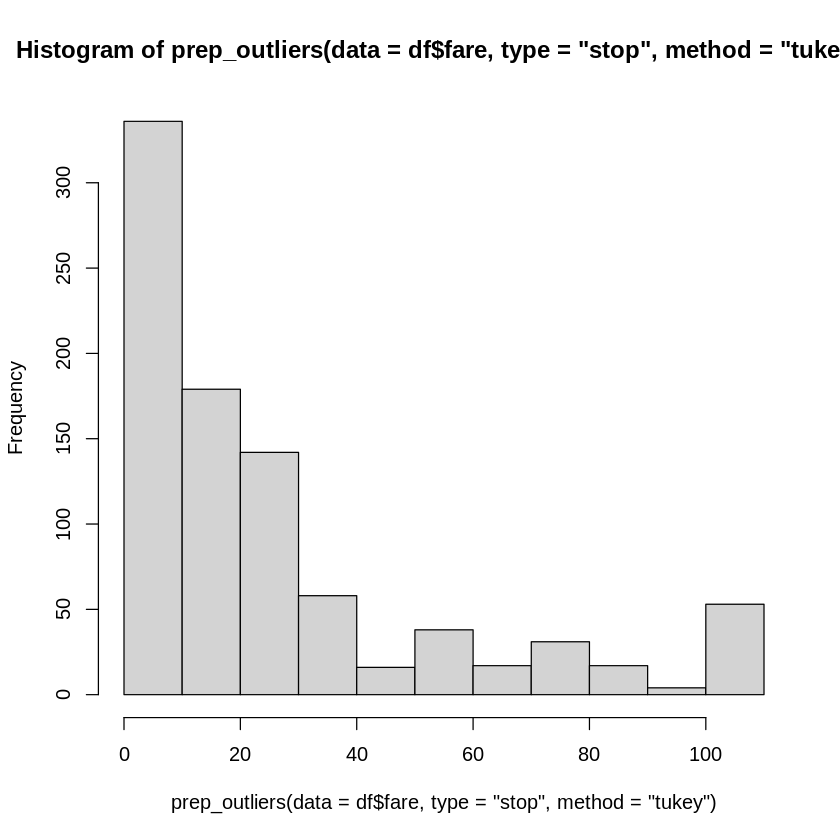

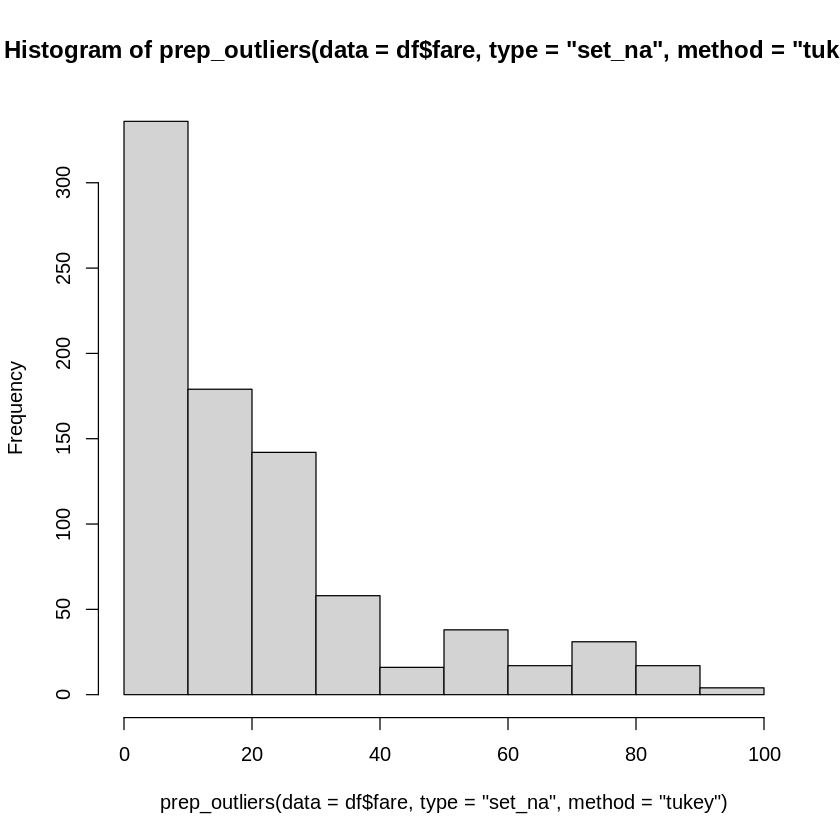

In [ ]:
# pacote funmodeleing ja nos permite algumas questões a serem tomadas para o inputamento quando identicamos outliers:
# setar como NA ou limitar.

hist(prep_outliers(data=df$fare, type='stop', method = "tukey"))
hist(prep_outliers(data=df$fare, type='set_na', method = "tukey")) #type pode ser 'set_na'


Para diminuir a incertezas agregadas ao modelo, sempre que preferir inputar os outliers o faça assim que os identificar, para não cair no mesmo grupo dos dados ausentes.
# Preenchimento de dados.

Existem maneiras básicas de se preencher os dados, como o valor médio/mediana/moda.
Mas é sempre recomendado usar de artifícios de modelagem numérica.
Vamos ao exemplo anterior, onde tínhamos uma relação conhecida (exponencial)




Formula: y ~ a * exp(b * x) + c

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  1.14799    0.16897   6.794 8.82e-10 ***
b  0.38519    0.01492  25.825  < 2e-16 ***
c -0.25780    0.53043  -0.486    0.628    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.044 on 97 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 1.209e-06


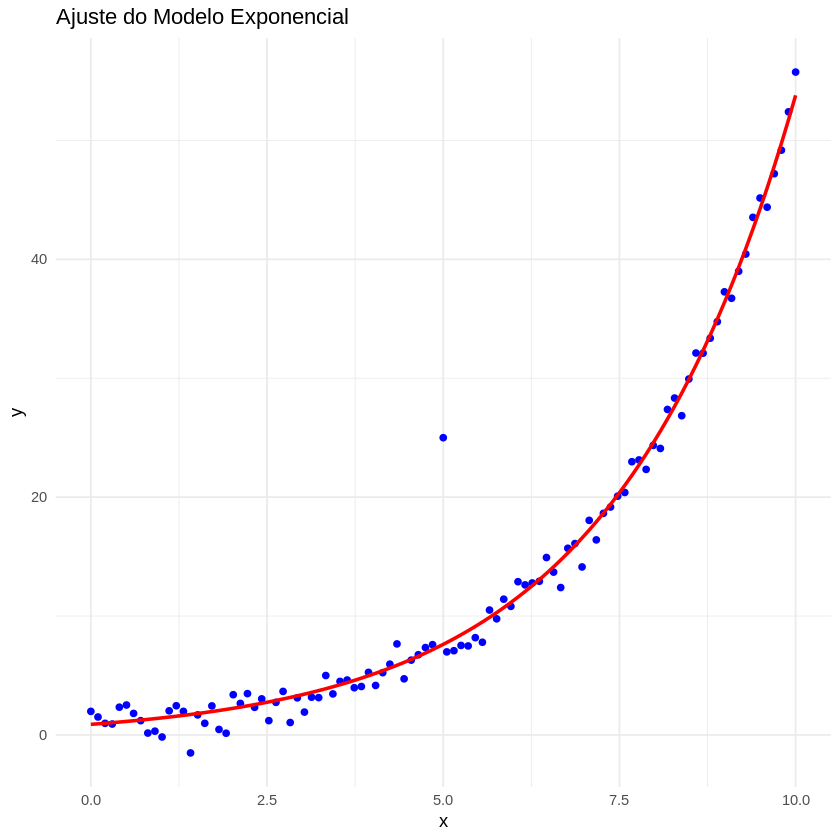

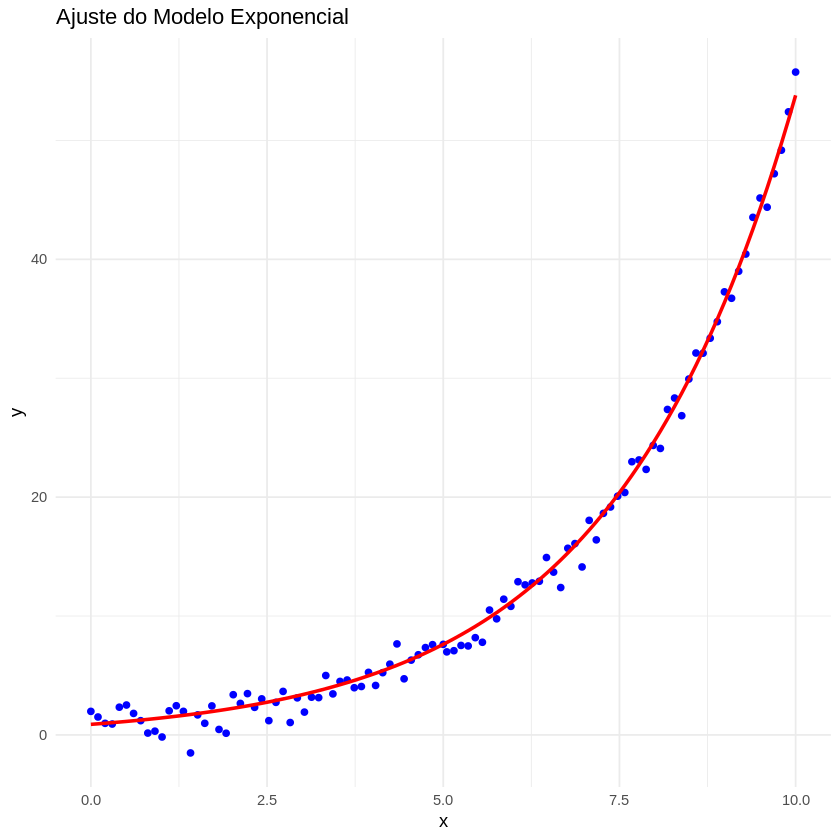

In [ ]:


# podemos utilizar qualquer modelo não linear nesta função (exponencial no caso)
modelo = nls(y ~ a * exp(b * x) + c, data = dados,list(a = 1, b = 0.1, c= 0))

# Verificar os parâmetros ajustados
summary(modelo)

# Predições com o modelo ajustado
dados$y_pred = predict(modelo)

# Visualizar o ajuste com ggplot2
library(ggplot2)
ggplot(dados, aes(x = x, y = y)) +
  geom_point(color = "blue", size = 1.5) +
  geom_line(aes(y = y_pred), color = "red", size = 1) +
  labs(title = "Ajuste do Modelo Exponencial",
       x = "x", y = "y") +
  theme_minimal()

# para preencher
dados=dados %>% mutate(y=ifelse(outlier=="Outlier",y_pred,y))

# Visualizar o ajuste com ggplot2
library(ggplot2)
ggplot(dados, aes(x = x, y = y)) +
  geom_point(color = "blue", size = 1.5) +
  geom_line(aes(y = y_pred), color = "red", size = 1) +
  labs(title = "Ajuste do Modelo Exponencial",
       x = "x", y = "y") +
  theme_minimal()

Outros modelos podem ser utilizados para o preenchimento quando não sabemos a forma das relações entre as variáveis, como KNN e randonForest que veremos nas próximas aulas.

# RECIPES

No que diz respeito aos demais passos do pré-processamento é aconselhável utilizar ferramentas especificas pois iremos alterar a forma (não a sua informação) dos dados. Logo os dados futuros que por ventura iremos utilizar no modelo terão que passar pelo mesmo padrão de alteração que os dados utilizados para o treinamento passaram.
Para isso o R dispõe do pacote `Recipes`.
Vamos utilizar o exemplo recente do titanic para aplicar toda informação adquirida durante a AED.

Primeiro ponto é pensar em qual modelo iremos usar e suas necessidades, para isso vamos olhar a figura a seguir: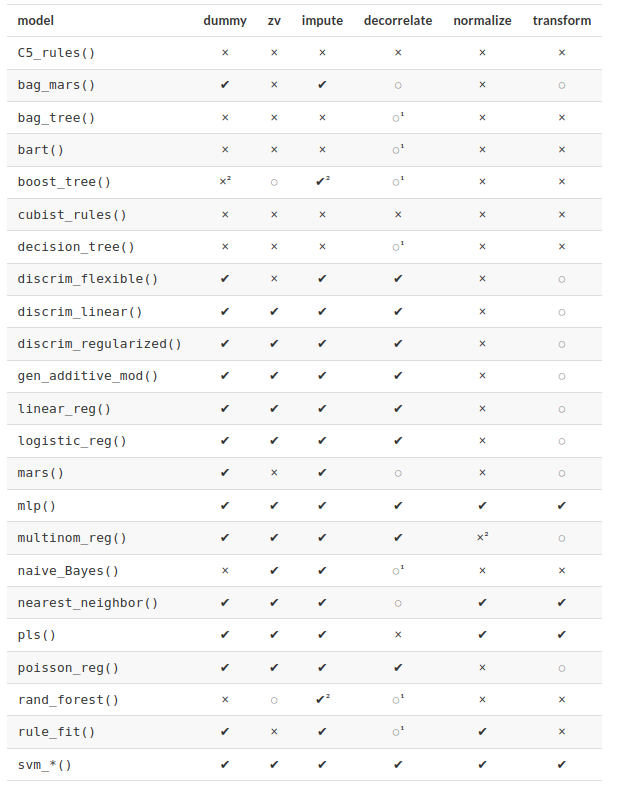

Como iremos utilizar um modelo de arvore de decisão (decision_tree()), não precisamos nos preocupar com alterações a serem feitas, mas podemos utilizar alguns recursos para compreender o funcionamento do recipes. [funções](https://www.tidymodels.org/find/recipes/)

In [ ]:
# vou fazer a primeira linha de comando o resto é com vcs:
# o que eu quero:
#>preenchimento de dados com knn utilizando a para imputar as variaveis 'sex','pclass'
#> criar uma variavel criança (idade menor ou igual 14), 0=não,1=sim
#> criar uma variavel mulher
#> o tamanho da familia (parch + sib_sp +1)
#> o titulo da pessoa e fazer o corte criando uma nova categoria "other"
#> transformar as categorias em fatores
#> remover as variveis que não utilizaremos: cabin, embarked, passenger_id, ticket, name, sib_sp, parch

receita_dados= recipe(survived~.,data=df) %>%
  step_mutate_at(c("sex","survived","pclass"), fn= as.factor) %>% # transformando as varaiveis para fatores
  step_

# preparação dos dados

prep_titanic=prep(receita_dados, retain=T) # retain vai manter os dados inicias

# gera os novos dados
df_p=bake(prep_titanic,new_data = NULL)# vamos utilizar os dados iniciais, por isso NULL

head(df_p)

Vamos comparar como ficou o preenchimento dos dados da idade.



In [ ]:
ggplot() +
  geom_histogram(data = df, aes(x = age, fill = "Age Original"), alpha = 0.5) +
  geom_histogram(data = df_p, aes(x = age, fill = "Age Filled"), alpha = 0.5) +
  labs(title = "Comparação de Histogramas de Idade",
       x = "Idade", y = "Frequência") +
  scale_fill_manual(values = c("Age Original" = "blue", "Age Filled" = "red"))

Vamos fazer algumas alterações recorrentes



In [ ]:
receita_dados= recipe(survived~.,data=df) %>%
  step_mutate_at(c("sex","survived","pclass"), fn= as.factor) %>% # transformando as variaveis para fatores
  step_impute_knn(age, fare, neighbors = 3, impute_with = c("sex","pclass","parch","sib_sp")) %>% # preenchendo os dados da idade e fare, baseado em suas relações com as demais variavies
  step_mutate(child = ifelse(age <=14, 1,0)) %>% # criei uma variavel criança
  step_mutate(woman = ifelse(age >14 & sex=="female",1,0)) %>%  # varaivel mulher
  step_mutate_at(c("child","woman"), fn= as.factor) %>% # passei para fatores
  step_mutate(family_size = parch + sib_sp +1) %>% # criei a variavel mulher
  step_mutate(title = str_extract(name,"[A-z]*\\.")) %>% # titulo
  step_other(title , threshold = 0.044) %>% # passei os menos frequentes para outros
  step_mutate_at(c("child","woman","family_size",'title'), fn= as.factor) %>% # passei para fatores
  step_select(-c(cabin,embarked,passenger_id,ticket,name,sib_sp,parch)) %>% # removi os que não irei usar
  step_YeoJohnson(all_numeric())  %>% # trasnformação em todas as numericas
  step_dummy(pclass) #decodificação

prep_titanic=prep(receita_dados, retain=T)

df_p=bake(prep_titanic,new_data = NULL)
head(df_p)

sex,age,fare,survived,child,woman,family_size,title,pclass_X2,pclass_X3
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
male,13.13537,1.906695,0,0,0,2,Mr.,0,1
female,20.34412,3.497536,1,0,1,2,Mrs.,0,0
female,15.02464,1.970428,1,0,1,1,Miss.,0,1
female,19.05526,3.304166,1,0,1,2,Mrs.,0,0
male,19.05526,1.981648,0,0,0,1,Mr.,0,1
male,16.84952,2.017147,0,0,0,1,Mr.,0,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 177 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


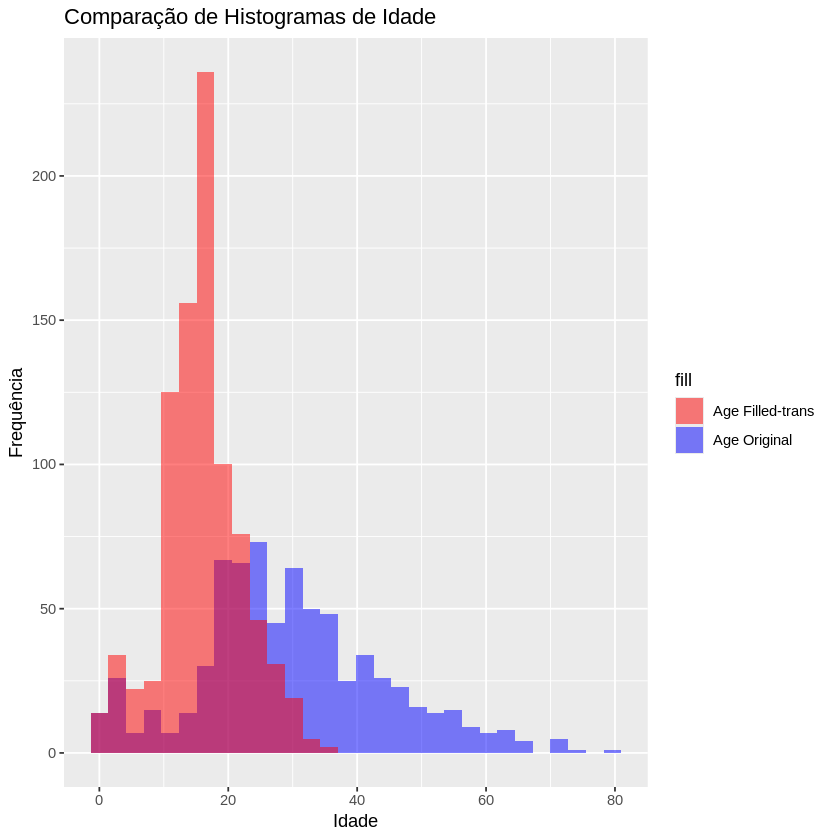

In [ ]:
#observar a diferença na idade preenchida e transformada.
ggplot() +
  geom_histogram(data = df, aes(x = age, fill = "Age Original"), alpha = 0.5) +
  geom_histogram(data = df_p, aes(x = age, fill = "Age Filled-trans"), alpha = 0.5) +
  labs(title = "Comparação de Histogramas de Idade",
       x = "Idade", y = "Frequência") +
  scale_fill_manual(values = c("Age Original" = "blue", "Age Filled-trans" = "red"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


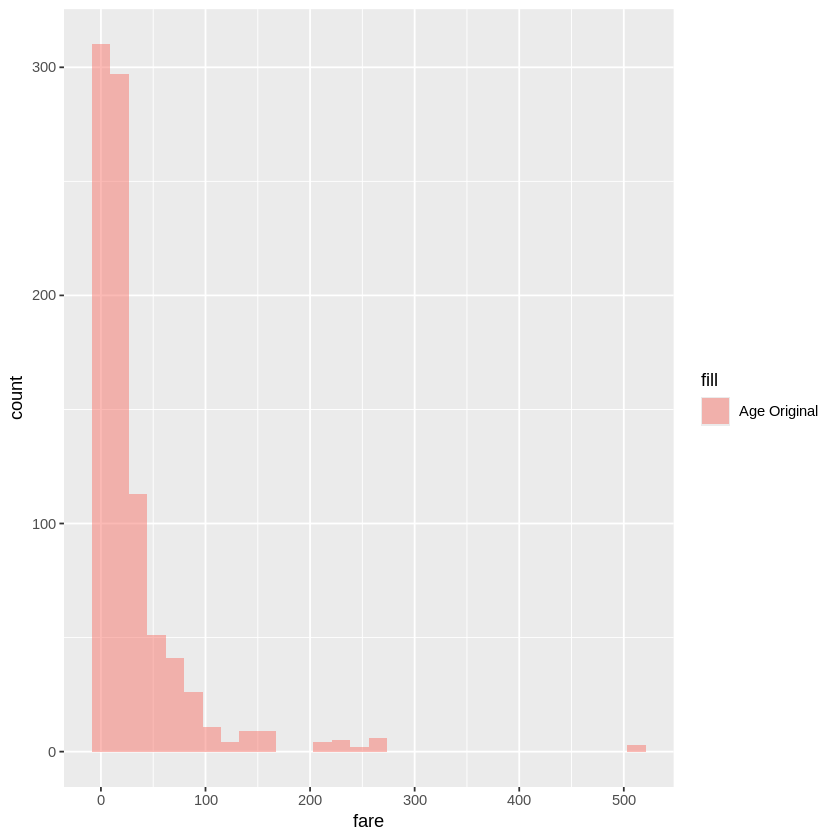

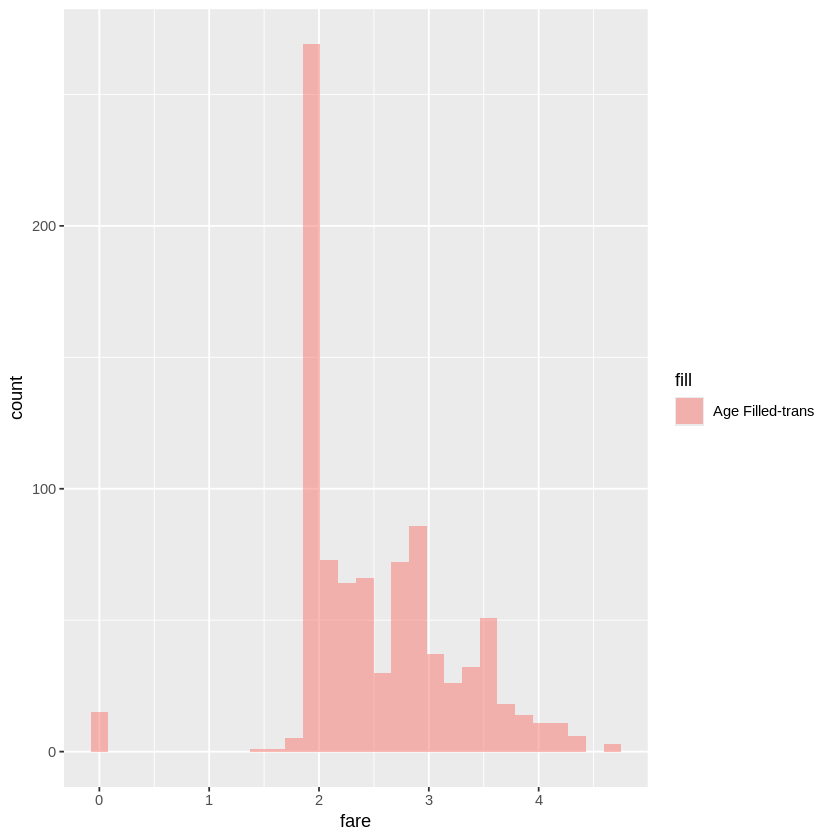

In [ ]:
ggplot() +
  geom_histogram(data = df, aes(x = fare, fill = "Age Original"), alpha = 0.5)
ggplot() +
  geom_histogram(data = df_p, aes(x = fare, fill = "Age Filled-trans"), alpha = 0.5)


Outro passo importante, em especial para modelos de redes neurais, é normalização.

In [ ]:

receita_dados= recipe(survived~.,data=df) %>%
  step_mutate_at(c("sex","survived","pclass"), fn= as.factor) %>% # transformando as varaiveis para fatores
  step_impute_knn(age, fare, neighbors = 3, impute_with = c("sex","pclass","parch","sib_sp")) %>% # preenchendo os dados da idade e fare, baseado em suas relações com as demais variavies
  step_mutate(child = ifelse(age <=14, 1,0)) %>% # criei uma variavel criança
  step_mutate(woman = ifelse(age >14 & sex=="female",1,0)) %>%  # varaivel mulher
  step_mutate(family_size = parch + sib_sp +1) %>% # criei a variavel mulher
  step_mutate(title = str_extract(name,"[A-z]*\\.")) %>% # titulo
  step_other(title , threshold = 0.044) %>% # passei os menos frquentes para outros
   step_mutate_at(c("child","woman","family_size",'title'), fn= as.factor) %>% # passei para fatores
  step_select(-c(cabin,embarked,passenger_id,ticket,name,sib_sp,parch)) %>% # removi os que não irei usar
  step_YeoJohnson(all_numeric())  %>% #transformação
   step_normalize(all_numeric_predictors()) %>% #normalização
  step_dummy(pclass) #decodificação




  prep_titanic=prep(receita_dados, retain=T)

# cozinha
df_p=bake(prep_titanic,new_data = NULL)
head(df_p)

sex,age,fare,survived,child,woman,family_size,title,pclass_X2,pclass_X3
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
male,-0.4678182,-0.8783255,0,0,0,2,Mr.,0,1
female,0.6938902,1.3358950,1,0,1,2,Mrs.,0,0
female,-0.1633571,-0.7896191,1,0,1,1,Miss.,0,1
female,0.4861880,1.0667528,1,0,1,2,Mrs.,0,0
male,0.4861880,-0.7740018,0,0,0,1,Mr.,0,1
male,0.1307263,-0.7245925,0,0,0,1,Mr.,0,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


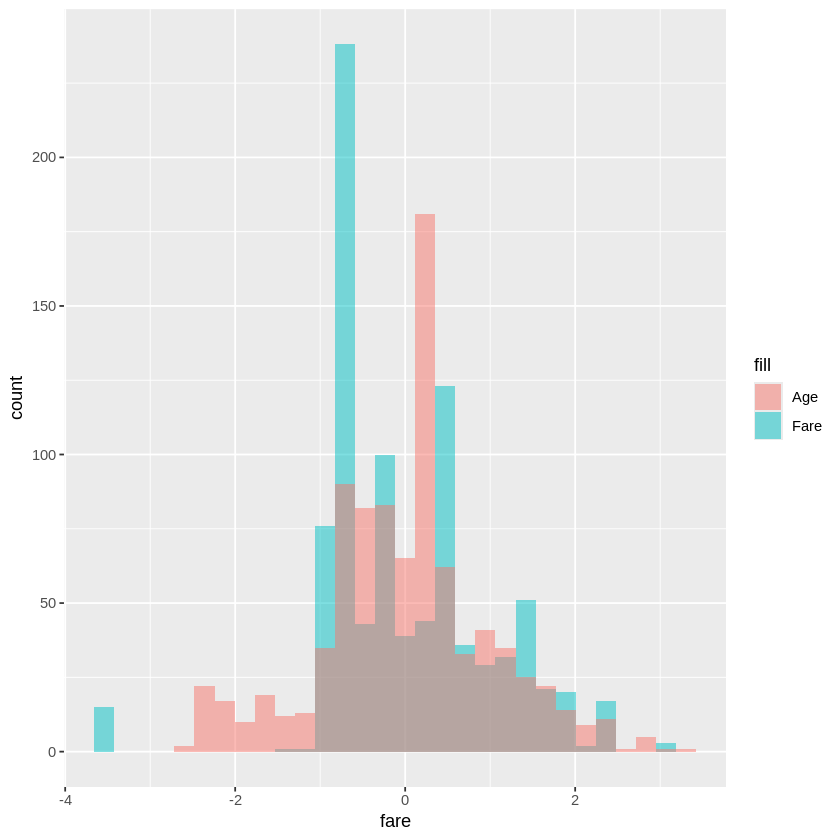

In [ ]:
# conseguimos agora colocar em um mesmo histograma para comparar.
ggplot() +
  geom_histogram(data = df_p, aes(x = fare, fill = "Fare"), alpha = 0.5) +
  geom_histogram(data = df_p, aes(x = age, fill = "Age"), alpha = 0.5)


Agora utilizando os dados do mtcars, faça o pre-processamento usando o recipes, visando um modelo de regressão linear.

In [ ]:
# lembrando: muita informação do que fazer com apenas esses comandos
head(mtcars)
df_status(mtcars)
profiling_num(mtcars)
# transforme o que julgar necessario em categorico(factor)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


   variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1       mpg       0    0.00    0    0     0     0 numeric     25
2       cyl       0    0.00    0    0     0     0 numeric      3
3      disp       0    0.00    0    0     0     0 numeric     27
4        hp       0    0.00    0    0     0     0 numeric     22
5      drat       0    0.00    0    0     0     0 numeric     22
6        wt       0    0.00    0    0     0     0 numeric     29
7      qsec       0    0.00    0    0     0     0 numeric     30
8        vs      18   56.25    0    0     0     0 numeric      2
9        am      19   59.38    0    0     0     0 numeric      2
10     gear       0    0.00    0    0     0     0 numeric      3
11     carb       0    0.00    0    0     0     0 numeric      6


variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99,skewness,kurtosis,iqr,range_98,range_80
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
mpg,20.090625,6.0269481,0.2999881,10.40000,11.9950,15.42500,19.200,22.80,31.30000,33.43500,0.6404399,2.799467,7.37500,"[10.4, 33.435]","[14.34, 30.09]"
cyl,6.187500,1.7859216,0.2886338,4.00000,4.0000,4.00000,6.000,8.00,8.00000,8.00000,-0.1831287,1.319032,4.00000,"[4, 8]","[4, 8]"
disp,230.721875,123.9386938,0.5371779,72.52600,77.3500,120.82500,196.300,326.00,449.00000,468.28000,0.4002724,1.910317,205.17500,"[72.526, 468.28]","[80.61, 396]"
hp,146.687500,68.5628685,0.4674077,55.10000,63.6500,96.50000,123.000,180.00,253.55000,312.99000,0.7614356,3.052233,83.50000,"[55.1, 312.99]","[66, 243.5]"
drat,3.596563,0.5346787,0.1486638,2.76000,2.8535,3.08000,3.695,3.92,4.31450,4.77500,0.2788734,2.435116,0.84000,"[2.76, 4.775]","[3.007, 4.209]"
wt,3.217250,0.9784574,0.3041285,1.54462,1.7360,2.58125,3.325,3.61,5.29275,5.39951,0.4437855,3.172471,1.02875,"[1.54462, 5.39951]","[1.9555, 4.0475]"
qsec,17.848750,1.7869432,0.1001159,14.53100,15.0455,16.89250,17.710,18.90,20.10450,22.06920,0.3870456,3.553753,2.00750,"[14.531, 22.0692]","[15.534, 19.99]"
vs,0.437500,0.5040161,1.1520369,0.00000,0.0000,0.00000,0.000,1.00,1.00000,1.00000,0.2519763,1.063492,1.00000,"[0, 1]","[0, 1]"
am,0.406250,0.4989909,1.2282853,0.00000,0.0000,0.00000,0.000,1.00,1.00000,1.00000,0.3817709,1.145749,1.00000,"[0, 1]","[0, 1]"


Vamos fazer o basico. Da Aula de AED ja sabemos que o melhor modelo linear era o mpg ~ wt + qsec + am.





In [ ]:
#Primeiro passo, sabendo o modelo (lm) que iremos usar ja sabemos quais os steps basicos:

# Remover variaveis de baixa variancia (não temos)
# Imputar, preencher dados ausentes (não temos)
# remover correlações altas entre as variaveis preditoras.
# Decodificação (decompor fatores em colunas binarias)
# opcional: corrigir assimetrias (não é o caso)

# processe a receita a cada passo adcionado para visualisar os novas modificações
mtcars_rec = recipe(mpg ~ wt + disp + qsec + am + cyl, data=mtcars) %>% # mesmo sabendo quais variaveis vão ser melhores, adcionei o disp e cyl para utilisar um step especifico.
  step_mutate_at(c("am","cyl"), fn= as.factor) %>% # transformei "am" em fato, como ja esta 0 e 1 n precisa fazer dommy
  step_corr(all_numeric_predictors(), threshold=0.85) %>% # ponto de corte de 0.85
  step_dummy(all_factor_predictors()) %>% # poderia ter definido apena a cyl
  prep()

mtcars_p=bake(mtcars_rec, new_data = NULL)
head(mtcars_p)

wt,qsec,mpg,am_X1,cyl_X6,cyl_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.620,16.46,21.0,1,1,0
2.875,17.02,21.0,1,1,0
2.320,18.61,22.8,1,0,0
3.215,19.44,21.4,0,1,0
3.440,17.02,18.7,0,0,1
3.460,20.22,18.1,0,1,0


# RESUMO

In [ ]:
# Os steps básicos para adequar os dados ao modelo

# manipulações de variáveis com o mutate, por questão de organização
# é interessante fazer dentro do recipes, mas pode ser externo.

step_mutate
step_mutate_at
step_select

# Decodificação

step_dummy

# Imputar (Preencher)

step_impute_bag
step_impute_knn
step_impute_ # existem diversos

# descorrelacionar

step_corr # ponto de corte aproximado  0.85

# remover variaveis de baixas variancias

step_zv
step_nzv

# normalização

step_normalize

# transformação (correção de simetria e normalidade)

step_log
step_BoxCox
step_YeoJohnson

# step de redução de dimensionalidade via PCA, veremos a seguir

step_pca # definir um ponte de corte da contribuição acumulatia das componentes(0.9)




# Analise das componentes Principais
Um ponto muito importante dentro do pre processamento é redução de dimensionalidade, para isso podemos usar a PCA (analise das componentes principais)
Para isso vamos trabalhar com os dados de de flores iris.:

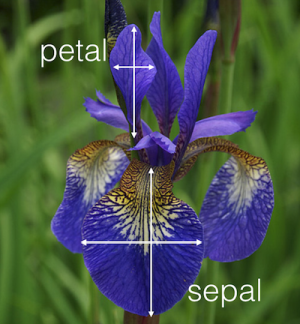

In [ ]:
#install.packages('factoextra')
library(factoextra) # Para criar alguns gráficos
data(iris)
head(iris)
iris=iris %>% janitor::clean_names() %>% dplyr::select(-species)# remover a especies (categoricas), bem como a alvo
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,sepal_length,sepal_width,petal_length,petal_width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


Para realizarmos a PCA temos que normalisar as variaveis para ter sd=1 e media=0

In [ ]:
PCA_iris=prcomp(iris,center = T,scale. = T) # ja faz a normalização
PCA_iris

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
sepal_length  0.5210659 -0.37741762  0.7195664  0.2612863
sepal_width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
petal_length  0.5804131 -0.02449161 -0.1421264 -0.8014492
petal_width   0.5648565 -0.06694199 -0.6342727  0.5235971

Os autovalores são o SD², e os pesos de cada variavel em cada componentes são os autovetores. que devem ser multiplicados pelos valores normalizados da nossa matriz.

In [ ]:
summary(PCA_iris)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

Obeserve que com as 2 primeira componentes ja consiguimos a explicação da variabilidade de 95%

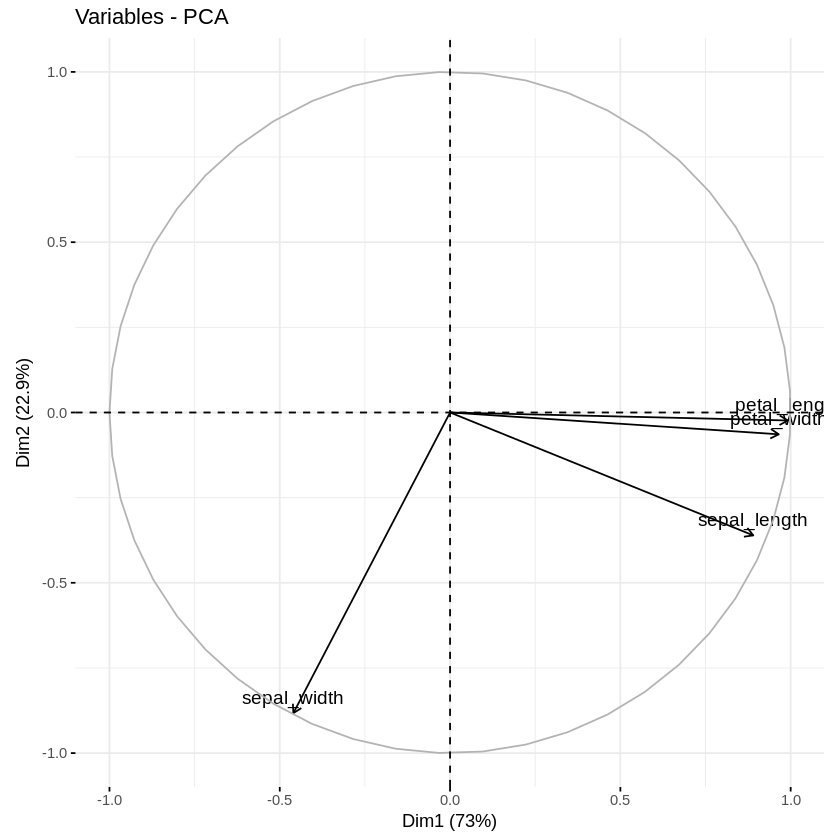

In [ ]:
fviz_pca_var(PCA_iris)

valores das novas variaveis.

In [ ]:
PCA_iris$x

PC1,PC2,PC3,PC4
-2.257141,-0.47842383,0.127279624,0.024087508
-2.074013,0.67188269,0.233825517,0.102662845
-2.356335,0.34076642,-0.044053900,0.028282305
-2.291707,0.59539986,-0.090985297,-0.065735340
-2.381863,-0.64467566,-0.015685647,-0.035802870
-2.068701,-1.48420530,-0.026878250,0.006586116
-2.435868,-0.04748512,-0.334350297,-0.036652767
-2.225392,-0.22240300,0.088399352,-0.024529919
-2.326845,1.11160370,-0.144592465,-0.026769540
-2.177035,0.46744757,0.252918268,-0.039766068


Como aplicar utilizando o `recipes`

In [ ]:
data(iris)
pca_rec=recipe(Species~.,data=iris) %>%
  step_normalize(all_numeric_predictors())%>%
  step_pca(all_numeric_predictors(),threshold=0.9)%>%
  prep()

pca_rec$steps[[2]]$res


saida=bake(pca_rec,new_data = NULL)
saida

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Species,PC1,PC2
<fct>,<dbl>,<dbl>
setosa,-2.257141,-0.47842383
setosa,-2.074013,0.67188269
setosa,-2.356335,0.34076642
setosa,-2.291707,0.59539986
setosa,-2.381863,-0.64467566
setosa,-2.068701,-1.48420530
setosa,-2.435868,-0.04748512
setosa,-2.225392,-0.22240300
setosa,-2.326845,1.11160370
